In [2]:
import torch
from kan import *
import seaborn as sns
import numpy as np

In [3]:
device_index = 0
device = torch.device(f'cuda:{device_index}' if torch.cuda.is_available() else 'cpu')
width=[4, 3, 2, 1]
d = 10
w = 100
width=[w]*d #1000
grid=9 #5
k=3
seed=0
sp_trainable=False
sb_trainable=False
affine_trainable=False

mode=None
native_noise_scale=False
#noise_scale=0.3
noise_scale=10.0

In [4]:
import numpy as np
import torch

# Parameters
n_samples = 1000
data_noise_level = 1.0  # Adjust as needed
data_distribution = 'uniform'  # Change to 'normal' for normal distribution
#data_distribution = 'normal'

# Generate random data based on the specified distribution
if data_distribution == 'uniform':
    # Generate random data from a uniform distribution
    train_input = np.random.uniform(low=-1, high=1, size=(n_samples, width[0]))
    test_input = np.random.uniform(low=-1, high=1, size=(n_samples, width[0]))
elif data_distribution == 'normal':
    # Generate random data from a normal distribution
    train_input = np.random.normal(loc=0.0, scale=data_noise_level, size=(n_samples, width[0]))
    test_input = np.random.normal(loc=0.0, scale=data_noise_level, size=(n_samples, width[0]))
else:
    raise ValueError("Invalid data_distribution. Choose 'uniform' or 'normal'.")

# Convert to PyTorch tensors
dtype = torch.get_default_dtype()
dataset = {}
dataset['train_input'] = torch.from_numpy(train_input).type(dtype).to(device)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype).to(device)
# Now dataset contains the generated random data

In [5]:
model=KAN(width=width, grid=grid, k=k, device=device, seed=seed,
        #sp_trainable=sp_trainable, sb_trainable=sb_trainable, affine_trainable=affine_trainable,
        #noise_scale=noise_scale,
        mode=mode,
        )

checkpoint directory created: ./model
saving model version 0.0


In [6]:
model(dataset['train_input'])
#model.plot(beta=100)
#model.plot()

tensor([[ 0.0077, -0.0097, -0.0038,  ..., -0.0008,  0.0067, -0.0060],
        [ 0.0077, -0.0097, -0.0038,  ..., -0.0008,  0.0067, -0.0060],
        [ 0.0077, -0.0097, -0.0038,  ..., -0.0008,  0.0067, -0.0060],
        ...,
        [ 0.0077, -0.0098, -0.0038,  ..., -0.0008,  0.0067, -0.0060],
        [ 0.0077, -0.0097, -0.0038,  ..., -0.0008,  0.0067, -0.0060],
        [ 0.0077, -0.0097, -0.0038,  ..., -0.0008,  0.0067, -0.0060]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [7]:
def reinit(model:KAN):
    #grid_range = model.grid_range
    depth = len(model.act_fun)


    for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun,model.spline_preacts)):

        grid_num = act_fun.num
        coef = act_fun.coef

        with torch.no_grad():
            print(coef.shape)
            #coef = coef * (layer_index+1) * grid_num #* 5

            #coef = (torch.rand(coef.shape) - 1/2) * (layer_index+1) * 0.5
            #coef = (torch.rand(coef.shape) - 1/2) * torch.log(layer_index + 1) * 0.5

            #layer_index_tensor = torch.tensor(layer_index + grid_num, dtype=torch.float32)  # Convert to tensor
            layer_index_tensor = torch.tensor(layer_index + 1, dtype=torch.float32) 
            width_tensor = torch.tensor(w, dtype=torch.float32) 
            #coef = (torch.rand(coef.shape) - 1/2)*2 * layer_index_tensor * 1.0
            #coef = (torch.rand(coef.shape) - 1/2)*2 * torch.log(layer_index_tensor) * 1.0
            #coef = (torch.rand(coef.shape) - 1/2)*2 * torch.log10(layer_index_tensor) * 1.0
            #coef = (torch.rand(coef.shape) - 1/2)*2 * torch.sqrt(width_tensor) * 0.13 # ~const var at width_tensor=100
            coef = (torch.rand(coef.shape) - 1/2)*2 * 1.0

        act_fun.coef = torch.nn.Parameter(coef)

reinit(model)
model(dataset['train_input'])

#model.plot(beta=100)

torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])
torch.Size([100, 100, 12])


tensor([[ 0.2188, -0.7480, -0.2565,  ..., -0.3044,  0.0548,  0.6028],
        [ 0.2258, -0.6100, -0.5084,  ..., -0.2510, -0.1889,  0.5983],
        [ 0.0424, -0.7140, -0.7764,  ...,  0.1707,  0.5627,  0.4508],
        ...,
        [ 0.2687, -1.0719, -0.3236,  ..., -0.4691,  0.4629,  0.4930],
        [-0.1806, -0.4015,  0.0689,  ..., -0.6312, -0.2942, -0.1979],
        [ 0.7488, -0.6311,  0.0598,  ..., -0.3620,  0.1397,  0.5879]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [8]:
model.feature_score

tensor([6701637.5000, 6970448.5000, 6694293.0000, 6614010.0000, 6824917.5000,
        6959287.0000, 6772050.0000, 6964617.0000, 7085822.5000, 6650514.5000,
        6571487.0000, 6551961.5000, 6880362.0000, 6696582.5000, 6675668.5000,
        6663254.5000, 6907909.5000, 6808479.0000, 7112202.5000, 6573282.0000,
        6647994.5000, 6757673.5000, 6542978.0000, 6757385.0000, 6682984.0000,
        6796204.5000, 6629642.5000, 6553279.0000, 6508887.5000, 7053644.5000,
        6808327.0000, 6939962.0000, 6601445.0000, 6947692.5000, 6722906.5000,
        7020498.0000, 6735530.5000, 6466232.0000, 6803348.5000, 6918026.0000,
        6547493.5000, 7156339.5000, 6524854.5000, 6860633.5000, 7100993.0000,
        7058412.5000, 6629275.5000, 6609442.0000, 6963152.0000, 6974757.0000,
        6833994.0000, 6810434.5000, 6877987.5000, 6604190.5000, 6522155.5000,
        6911564.5000, 6807628.0000, 6544363.5000, 7088316.0000, 6579930.0000,
        6533098.5000, 6700608.0000, 6723014.0000, 6911199.0000, 

In [9]:
means = []
vars = []
mins = []
maxs = []
for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun,model.spline_preacts)):
    grid_num = act_fun.num
    coef = act_fun.coef

    mean_value = acts.mean()
    var_value = acts.var()
    min_value = acts.min()
    max_value = acts.max()

    means.append(mean_value.cpu().numpy())
    vars.append(var_value.cpu().numpy())
    mins.append(min_value.cpu().numpy())
    maxs.append(max_value.cpu().numpy())

    print(layer_index, grid_num, coef.shape, acts.shape)
    print(f"mean={mean_value:.2e}, var={var_value:.2e}, min={min_value:.2e}, max={max_value:.2e}")

0 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=1.49e-03, var=3.34e-01, min=-1.00e+00, max=1.00e+00
1 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=-1.91e-02, var=1.86e-01, min=-1.83e+00, max=1.79e+00
2 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=-1.98e-02, var=1.66e-01, min=-1.78e+00, max=1.86e+00
3 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=5.81e-03, var=1.80e-01, min=-1.64e+00, max=1.97e+00
4 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=1.76e-02, var=1.84e-01, min=-2.00e+00, max=2.07e+00
5 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=-7.38e-03, var=1.77e-01, min=-1.86e+00, max=2.05e+00
6 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=-2.70e-02, var=1.57e-01, min=-1.88e+00, max=1.91e+00
7 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])
mean=2.68e-02, var=1.67e-01, min=-1.77e+00, max=1.69e+00
8 9 torch.Size([100, 100, 12]) torch.Size([1000, 100, 100])


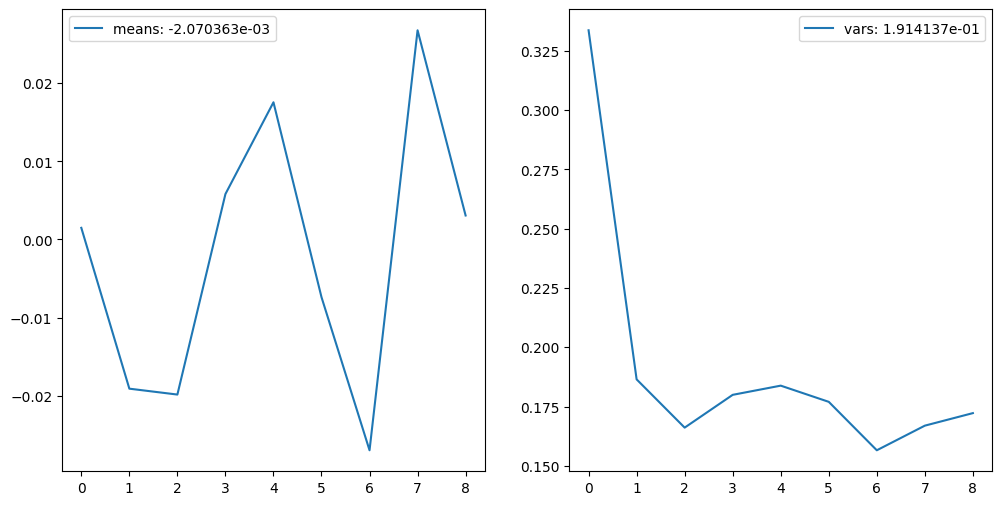

In [10]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].plot(means, label=f"means: {np.mean(means):2e}")
axs[0].legend()
axs[1].plot(vars, label=f"vars: {np.mean(vars):2e}")
axs[1].legend()
plt.show()

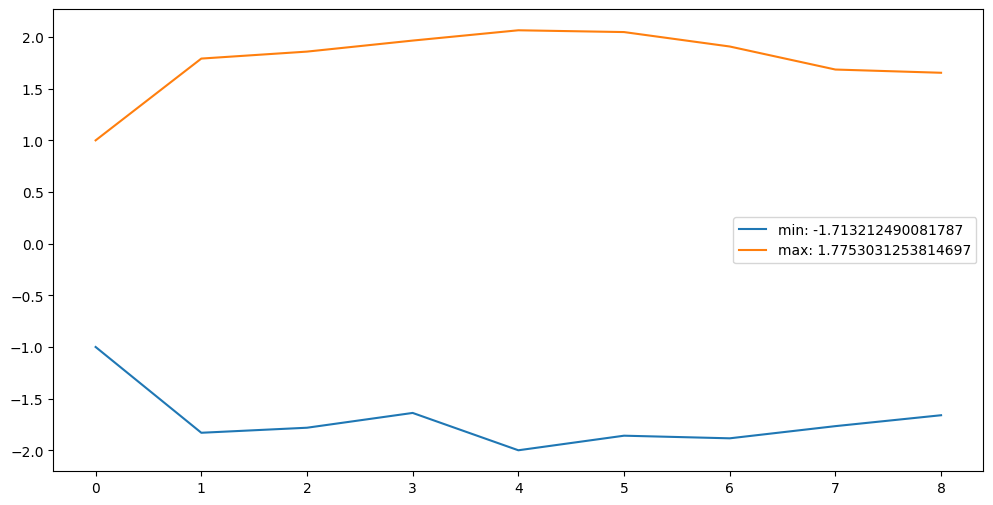

In [11]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
axs.plot(mins, label=f"min: {np.mean(mins)}")
axs.plot(maxs, label=f"max: {np.mean(maxs)}")
plt.legend()
plt.show()

small width = min/max are closer to 0 

big width = min_max closer to +inf

The coefs should be smaller if the width gets bigger

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# df = pd.DataFrame(columns=["layer", "act"])

# for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun,model.spline_preacts)):
#     acts_np = torch.flatten(acts).cpu().numpy()
#     for act in acts_np:
#         df.loc[len(df)] = [layer_index, act]
        
# # Sample data
# np.random.seed(10)
# data = pd.DataFrame({
#     'Group': np.repeat(['Group 1', 'Group 2', 'Group 3'], 100),
#     'Values': np.concatenate([np.random.normal(0, std, 100) for std in range(1, 4)])
# })

# print(data)

# print()

# # Create boxplot
# sns.boxplot(x='Group', y='Values', data=data)

# # Adding title
# plt.title('Boxplot Example with Seaborn')

# # Show plot
# plt.show()

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import torch  # Make sure to import torch if you're using it

# # Assuming model.act_fun and model.spline_preacts are defined
# data = []
# for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun, model.spline_preacts)):
#     acts_np = torch.flatten(acts).cpu().numpy()
#     data.append(acts_np)

# # Create a figure with specified size
# plt.figure(figsize=(12, 6))

# # Create a boxplot
# sns.boxplot(data=data)

# # Adding labels and title
# plt.title('Activations')
# plt.xlabel('Layer')
# plt.ylabel('Activations')
# plt.xticks(list(range(len(data))), list(range(len(data))))

# # Show plot
# plt.show()

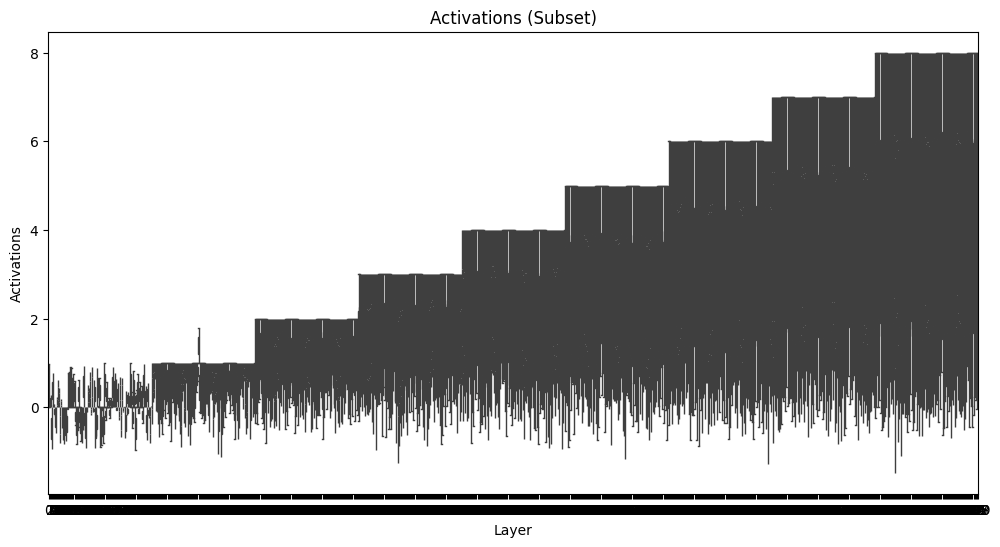

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

# Assuming model.act_fun and model.spline_preacts are defined
data = []
sample_size = 100  # Define the number of samples you want from each layer

for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun, model.spline_preacts)):
    acts_np = torch.flatten(acts).cpu().numpy()
    
    # Sample a subset of activations if there are more than sample_size
    if len(acts_np) > sample_size:
        sampled_acts = np.random.choice(acts_np, sample_size, replace=False)
    else:
        sampled_acts = acts_np  # Use all if less than sample_size
    
    # Append layer index and sampled activations to the data list
    data.extend([(layer_index, act) for act in sampled_acts])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Layer', 'Activation'])

plt.figure(figsize=(12, 6))

# Create a violin plot
sns.boxplot(data=data)

# Adding labels and title
plt.title('Activations (Subset)')
plt.xlabel('Layer')
plt.ylabel('Activations')

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

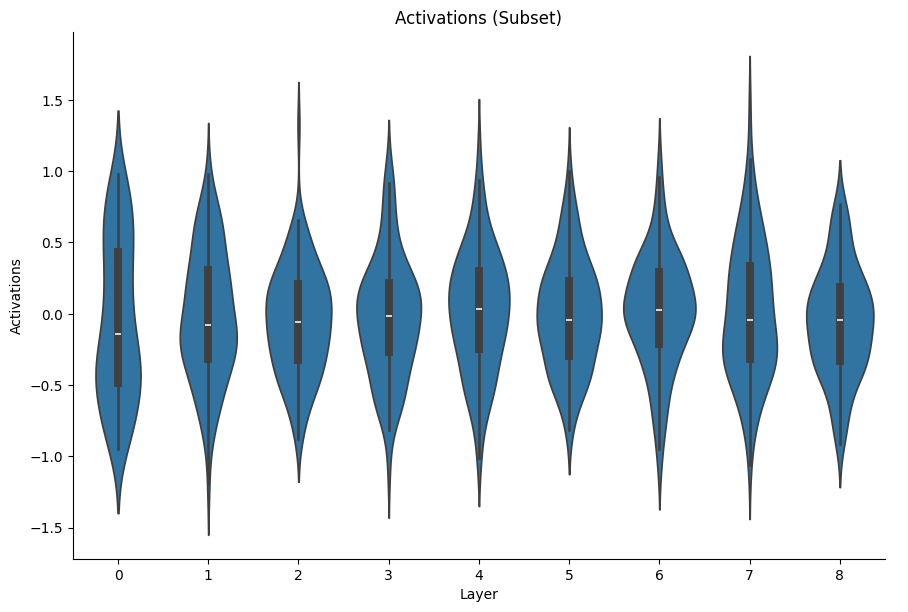

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

# Assuming model.act_fun and model.spline_preacts are defined
data = []
sample_size = 100  # Define the number of samples you want from each layer

for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun, model.spline_preacts)):
    acts_np = torch.flatten(acts).cpu().numpy()
    
    # Sample a subset of activations if there are more than sample_size
    if len(acts_np) > sample_size:
        sampled_acts = np.random.choice(acts_np, sample_size, replace=False)
    else:
        sampled_acts = acts_np  # Use all if less than sample_size
    
    # Append layer index and sampled activations to the data list
    data.extend([(layer_index, act) for act in sampled_acts])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Layer', 'Activation'])

plt.figure(figsize=(12, 6))

# Create a violin plot
sns.catplot(data=df, x="Layer", y="Activation", kind="violin", height=6, aspect=1.5)

# Adding labels and title
plt.title('Activations (Subset)')
plt.xlabel('Layer')
plt.ylabel('Activations')

# Show plot
plt.show()

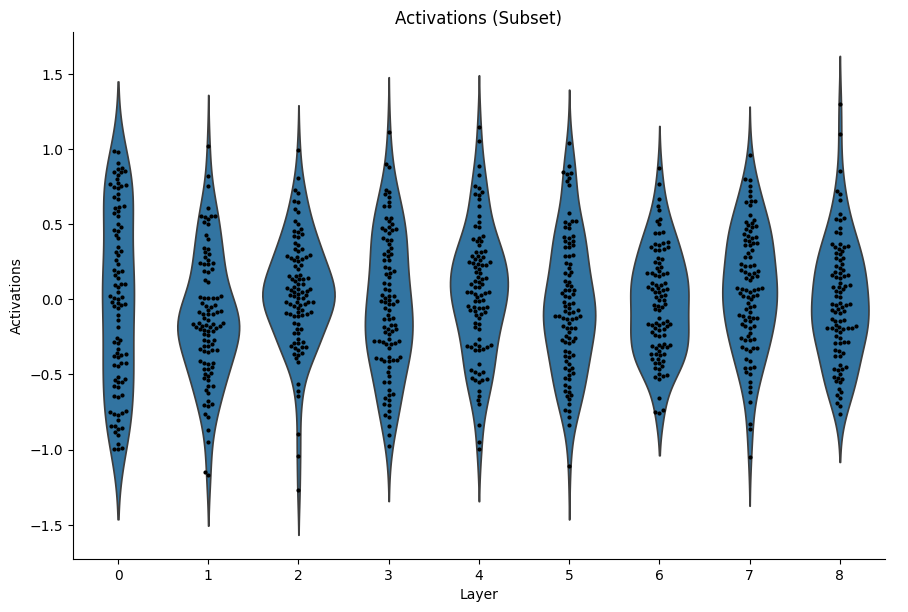

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

# Assuming model.act_fun and model.spline_preacts are defined
data = []
sample_size = 100  # Define the number of samples you want from each layer

for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun, model.spline_preacts)):
    acts_np = torch.flatten(acts).cpu().numpy()
    
    # Sample a subset of activations if there are more than sample_size
    if len(acts_np) > sample_size:
        sampled_acts = np.random.choice(acts_np, sample_size, replace=False)
    else:
        sampled_acts = acts_np  # Use all if less than sample_size
    
    # Append layer index and sampled activations to the data list
    data.extend([(layer_index, act) for act in sampled_acts])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Layer', 'Activation'])

# Create a violin plot
g = sns.catplot(data=df, x="Layer", y="Activation", kind="violin", inner=None, height=6, aspect=1.5)

# Overlay a swarm plot
sns.swarmplot(data=df, x="Layer", y="Activation", color="k", size=3, ax=g.ax)

# Adding labels and title
plt.title('Activations (Subset)')
plt.xlabel('Layer')
plt.ylabel('Activations')

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

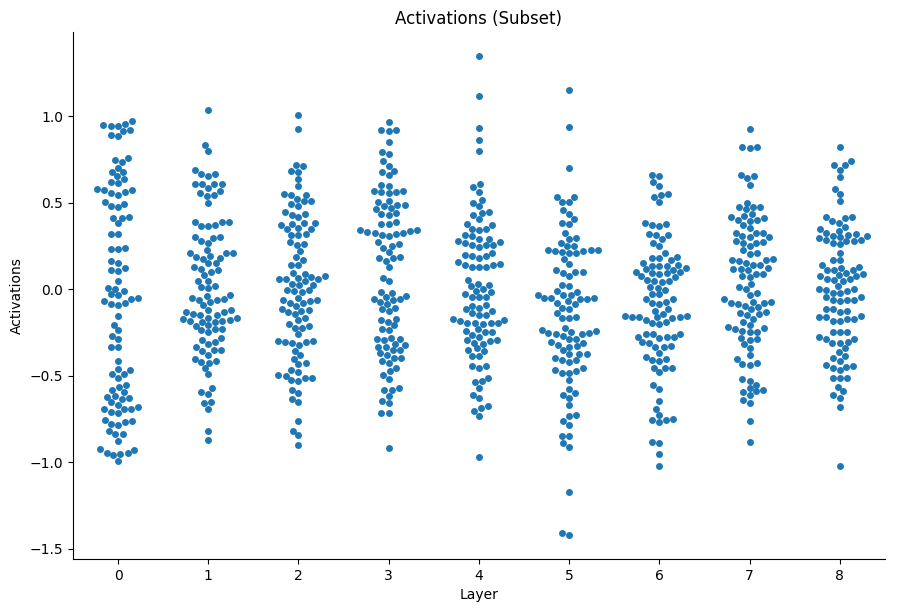

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

# Assuming model.act_fun and model.spline_preacts are defined
data = []
sample_size = 100  # Define the number of samples you want from each layer

for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun, model.spline_preacts)):
    acts_np = torch.flatten(acts).cpu().numpy()
    
    # Sample a subset of activations if there are more than sample_size
    if len(acts_np) > sample_size:
        sampled_acts = np.random.choice(acts_np, sample_size, replace=False)
    else:
        sampled_acts = acts_np  # Use all if less than sample_size
    
    # Append layer index and sampled activations to the data list
    data.extend([(layer_index, act) for act in sampled_acts])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Layer', 'Activation'])

plt.figure(figsize=(12, 6))

# Create a catplot
sns.catplot(data=df, x="Layer", y="Activation", kind="swarm", height=6, aspect=1.5)

# Adding labels and title
plt.title('Activations (Subset)')
plt.xlabel('Layer')
plt.ylabel('Activations')

# Show plot
plt.show()

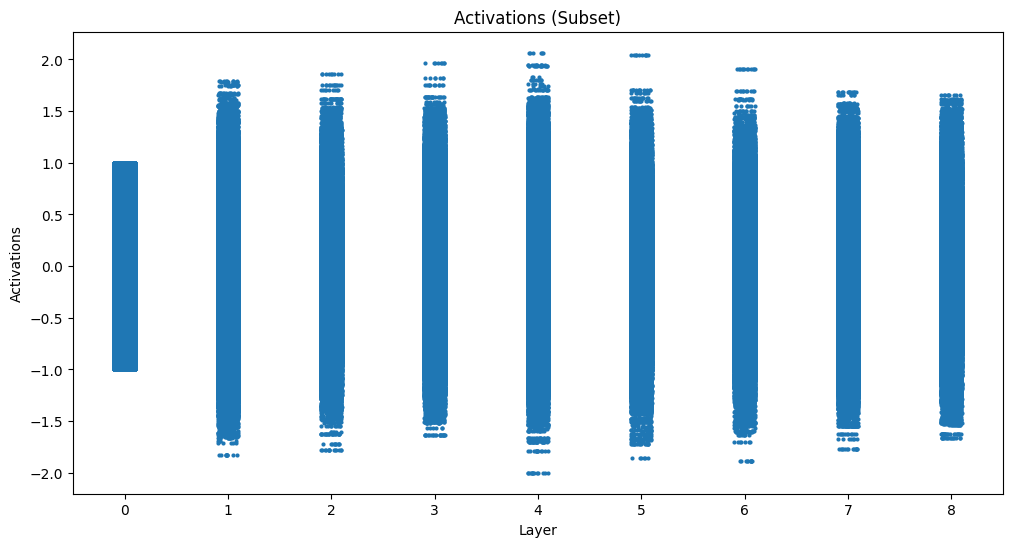

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

# Assuming model.act_fun and model.spline_preacts are defined
data = []
sample_size = 1_000_000  # Define the number of samples you want from each layer

for layer_index, (act_fun, acts) in enumerate(zip(model.act_fun, model.spline_preacts)):
    acts_np = torch.flatten(acts).cpu().numpy()
    
    # Sample a subset of activations if there are more than sample_size
    if len(acts_np) > sample_size:
        sampled_acts = np.random.choice(acts_np, sample_size, replace=False)
    else:
        sampled_acts = acts_np  # Use all if less than sample_size
    
    # Append layer index and sampled activations to the data list
    data.extend([(layer_index, act) for act in sampled_acts])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['Layer', 'Activation'])

plt.figure(figsize=(12, 6))

# Create a stripplot
sns.stripplot(data=df, x="Layer", y="Activation", jitter=True, size=3)

# Adding labels and title
plt.title('Activations (Subset)')
plt.xlabel('Layer')
plt.ylabel('Activations')

# Show plot
plt.show()